# MNIST Point Set Visualization
- By running this script, you can get images of point sets.
## To run this code...
- You should prepare the summary file by running sample_and_summarize.py with a trained checkpoint.
- You should install below libraries.
    - matplotlib
    - open3d
    - numpy
    - torch
    - torchvision
    - tqdm

In [1]:
import os
import random
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import open3d as o3d

import numpy as np
import torch
torch.no_grad()
from torchvision.utils import save_image, make_grid

from draw import draw

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Set directories
1. summary file path: summary_name
2. path to save images: save_dir

In [2]:
save_dir = 'images'
experiment_name = 'cd138mm'
summary_name = os.path.join('../checkpoints/gen/', experiment_name, 'summary.pth')

imgdir = os.path.join(save_dir, experiment_name)
imgdir_gt = os.path.join(imgdir, 'gt')
imgdir_recon = os.path.join(imgdir, 'recon')
imgdir_gen = os.path.join(imgdir, 'gen')

os.makedirs(save_dir, exist_ok=True)
os.makedirs(imgdir_gt, exist_ok=True)
os.makedirs(imgdir_recon, exist_ok=True)
os.makedirs(imgdir_gen, exist_ok=True)

In [3]:
summary = torch.load(summary_name)
for k, v in summary.items():
    try:
        print(f"{k}: {v.shape}")
    except AttributeError:
        print(f"{k}: {len(v)}")

smp_set: torch.Size([7, 2500, 20])
smp_mask: torch.Size([7, 2500])
smp_att: 5
priors: 6
recon_set: torch.Size([7, 2500, 20])
recon_mask: torch.Size([7, 2500])
posteriors: 6
dec_att: 5
enc_att: 5
gt_set: torch.Size([7, 3414, 20])
gt_mask: torch.Size([7, 3414])
mean: torch.Size([1])
std: torch.Size([1])
sid: 1
mid: 1
cardinality: 1


## Select the samples to visualize
- parse the samples by index.
- below default code will visualize all samples. **Warning: Requires Huge Memory**

In [4]:
recon_targets = list(range(len(summary['gt_mask'])))[:]
gen_targets = list(range(len(summary['smp_mask'])))[:]

In [5]:
len_att = len(summary['dec_att'])
gt = summary['gt_set'][recon_targets]
gt_mask = summary['gt_mask'][recon_targets]

recon = summary['recon_set'][recon_targets]
recon_mask = summary['recon_mask'][recon_targets]

dec_att = [summary['dec_att'][l][:, :, recon_targets] for l in range(len_att)]
enc_att = [summary['enc_att'][l][:, :, recon_targets] for l in range(len_att)]

gen = summary['smp_set'][gen_targets]
gen_mask = summary['smp_mask'][gen_targets]
gen_att = [summary['smp_att'][l][:, :, gen_targets] for l in range(len_att)]

## Visualize

In [6]:
def visualize(gt, gt_mask):
    return draw(gt, gt_mask)

### Visualize Recon

In [7]:
recon_imgs = visualize(recon, recon_mask)
for idx in range(len(recon_targets)):
    data_idx = recon_targets[idx]
    if torch.nonzero(recon_imgs[idx].float().mean(0) != 1).shape[0] == 0:
        print("SKIP")
        continue
    save_image(recon_imgs[idx] / 255., os.path.join(imgdir_recon, f'{data_idx}.png'))
del recon_imgs

### Visualize GT

In [8]:
gt_imgs = visualize(gt, gt_mask)
for idx in range(len(recon_targets)):
    data_idx = recon_targets[idx]
    if torch.nonzero(gt_imgs[idx].float().mean(0) != 1).shape[0] == 0:
        print("SKIP")
        continue
    save_image(gt_imgs[idx]/255, os.path.join(imgdir_gt, f'{data_idx}.png'))
del gt_imgs

In [36]:
#load data, for annotation
import scanpy as sc
adata = sc.read_h5ad('/home/rpeyser/GitHub/mm_singlecell/outputs/script3.5/cd138_adata_postQC_groundtruthlabeled_leidenresults.h5ad')

In [42]:
adata.obs[adata.obs.person=="MM-3"].ground_truth

index
AAACCTGAGCACCGTC-1-MM-3.138P    malignant
AAACCTGGTTCGGGCT-1-MM-3.138P    malignant
AAACGGGAGCCACGTC-1-MM-3.138P    malignant
AAACGGGCAGGTCTCG-1-MM-3.138P    malignant
AAACGGGGTTCGTGAT-1-MM-3.138P    malignant
                                  ...    
TTTGCGCCAGACAGGT-1-MM-3.138P    malignant
TTTGCGCTCGTACGGC-1-MM-3.138P    malignant
TTTGGTTCATCGATGT-1-MM-3.138P    malignant
TTTGGTTGTTGTGGCC-1-MM-3.138P    malignant
TTTGTCACACCTCGTT-1-MM-3.138P    malignant
Name: ground_truth, Length: 950, dtype: category
Categories (2, object): ['healthy plasma', 'malignant']

In [24]:
i=0
gt[i,~gt_mask[i],:3].shape

torch.Size([950, 3])

In [31]:
def axis_set_3d(ax, back_color):
    ax.set_facecolor((back_color[0], back_color[1], back_color[2]))
    ax._axis3don = True
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.w_xaxis.set_pane_color((back_color[0], back_color[1], back_color[2], 1.))
    ax.w_yaxis.set_pane_color((back_color[0], back_color[1], back_color[2], 1.))
    ax.w_zaxis.set_pane_color((back_color[0], back_color[1], back_color[2], 1.))

In [52]:
adata.obs[adata.obs.person=="MM-3"].ground_truth.value_counts()

malignant         944
healthy plasma      6
Name: ground_truth, dtype: int64

In [56]:
dict(zip())

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5',
       '#ad494a'], dtype=object)

In [63]:
leiden_colormap = dict(zip(adata.obs.leiden.cat.categories, adata.uns['leiden_colors']))

In [ ]:
adata.obs[adata.obs.person=="MM-3"].ground_truth.map({'malignant':'red','healthy plasma':'blue'})

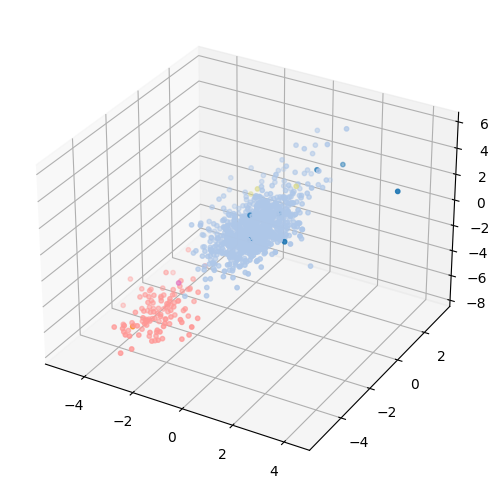

In [64]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
#axis_set_3d(ax, back_color=(1,1,1))

ax.scatter(-gt[i,~gt_mask[i],2], gt[i,~gt_mask[i],0], gt[i,~gt_mask[i],1], c=adata.obs[adata.obs.person=="MM-3"].leiden.map(leiden_colormap), marker='o', s=10)
fig.tight_layout()
fig.canvas.draw()

### Visualize Generated Samples

In [9]:
gen_imgs = visualize(gen, gen_mask)
for idx in range(len(gen_targets)):
    if torch.nonzero(gen_imgs[idx].float().mean(0) != 1).shape[0] == 0:
        print("SKIP")
        continue
    data_idx = gen_targets[idx]
    save_image(gen_imgs[idx]/255, os.path.join(imgdir_gen, f'{data_idx}.png'))
del gen_imgs

In [10]:
print("Done")

Done
